In [5]:
import os
import pandas as pd
from Filters import isovalent_generator

## Import the ICSD Dataset (only to be run when you have the full dataset in H5)

In [ ]:
h5_filename = 'all_materials_9June2022.h5'  # Replace with the actual HDF5 file name
h5_file_path = os.path.join('Materials', h5_filename)

# Read the HDF5 file
mat_db = pd.read_hdf(h5_file_path)

# Find the materials with ICSD ID
icsd_true = mat_db[mat_db['icsd_ids'].apply(lambda x: len(x) != 0)]
print(f"Number of materials with ICSD ID: {len(icsd_true)}")

# Display the first few rows of the filtered dataframe
icsd_true.head()

extracted_data = icsd_true[['pretty_formula', 'icsd_ids']]
extracted_data.reset_index(inplace=True)  # To include material_id as a column
print(extracted_data)
extracted_data.to_csv('icsd_materials.csv', index=False)  # Save to CSV

Number of materials with ICSD ID: 48644


energy  energy_per_atom      volume  \
material_id                                           
mp-1002206  -13.575914        -6.787957   16.609992   
mp-10164    -25.942905        -3.242863  236.713932   
mp-1025377  -15.655602        -2.236515  280.632053   
mp-1057273   -7.205689        -3.602845   69.650693   
mp-1065918  -26.965698        -6.741424   52.787069   

             formation_energy_per_atom  nsites  \
material_id                                      
mp-1002206                    0.537123       2   
mp-10164                     -0.586134       8   
mp-1025377                   -0.426901       7   
mp-1057273                    0.109745       2   
mp-1065918                    0.018608       4   

                             unit_cell_formula pretty_formula  is_hubbard  \
material_id                                                                 
mp-1002206               {'Si': 1.0, 'C': 1.0}            SiC       False   
mp-10164     {'Na': 2.0, 'Ga': 2.0, 'Te': 4.0}        NaGaTe2       False   
mp-1025377    {'Cd': 1.0, 'Ag': 2.0, 'I': 4.0}      Cd(AgI2)2       False   
mp-1057273                         {'Pb': 2.0}             Pb       False   
mp-1065918   {'Mn': 2.0, 'Cu': 1.0, 'Ge': 1.0}        Mn2CuGe       False   

                 elements  nelements  ...   density icsd_id  icsd_ids  \
material_id                           ...                               
mp-1002206        [Si, C]          2  ...  4.008509    None  [182362]   
mp-10164     [Ga, Na, Te]          3  ...  4.881189    None   [44702]   
mp-1025377    [Cd, Ag, I]          3  ...  4.945340    None  [190587]   
mp-1057273           [Pb]          1  ...  9.879692    None  [105158]   
mp-1065918   [Cu, Ge, Mn]          3  ...  7.740451    None  [184949]   

                                                           cif  \
material_id                                                      
mp-1002206   # generated using pymatgen\ndata_SiC\n_symmetr...   
mp-10164     # generated using pymatgen\ndata_NaGaTe2\n_sym...   
mp-1025377   # generated using pymatgen\ndata_Cd(AgI2)2\n_s...   
mp-1057273   # generated using pymatgen\ndata_Pb\n_symmetry...   
mp-1065918   # generated using pymatgen\ndata_Mn2CuGe\n_sym...   

            total_magnetization  oxide_type  \
material_id                                   
mp-1002206             0.001410        None   
mp-10164               0.000030        None   
mp-1025377             0.000251        None   
mp-1057273             0.000010        None   
mp-1065918             0.624599        None   

                                                          tags  \
material_id                                                      
mp-1002206                         [Silicon carbide - RS-type]   
mp-10164                            [Sodium gallium telluride]   
mp-1025377   [Cu2HgI4, Ag2CdI4 ht3, Disilver cadmium tetrai...   
mp-1057273                            [Sodium lead (5/2) - HT]   
mp-1065918                [Manganese copper germanium (2/1/1)]   

                                                    elasticity  \
material_id                                                      
mp-1002206   {'G_Reuss': 135.0, 'G_VRH': 176.0, 'G_Voigt': ...   
mp-10164                                                  None   
mp-1025377   {'G_Reuss': 4.0, 'G_VRH': 6.0, 'G_Voigt': 8.0,...   
mp-1057273                                                None   
mp-1065918                                                None   

                      created_at created year  
material_id                                    
mp-1002206   2016-07-27 07:02:39         2016  
mp-10164     2011-05-28 14:19:03         2011  
mp-1025377   2016-10-08 06:37:16         2016  
mp-1057273   2018-03-20 06:08:06         2018  
mp-1065918   2018-03-21 18:51:45         2018  

[5 rows x 28 columns]

## Run to load the ICSD dataset provided with the repo as a csv file

In [2]:
icsd_true = pd.read_csv(os.path.join('Materials', 'icsd_materials.csv'))
print(icsd_true.head())

  material_id pretty_formula  icsd_ids
0  mp-1002206            SiC  [182362]
1    mp-10164        NaGaTe2   [44702]
2  mp-1025377      Cd(AgI2)2  [190587]
3  mp-1057273             Pb  [105158]
4  mp-1065918        Mn2CuGe  [184949]


## Isovalent substituion 

The isovalent substituion algorithm is used to generate materials (at least for now). We start with a material defined as "comp" and set certain criterias as "conditions" which are followed to generate materials by substituting user specified elements from the starting composition.

# Case 1: conditions = ['charge']

Conditions
----------------------------------------------------------------
charge: 2
coordination: None
target_property: None
target_percentage: None
----------------------------------------------------------------
----------------------------------------------------------------
Properties of the Target element
----------------------------------------------------------------
    Ion Coordination  Charge  Ionic Radius
312  Pb         VIII       2          1.29
----------------------------------------------------------------


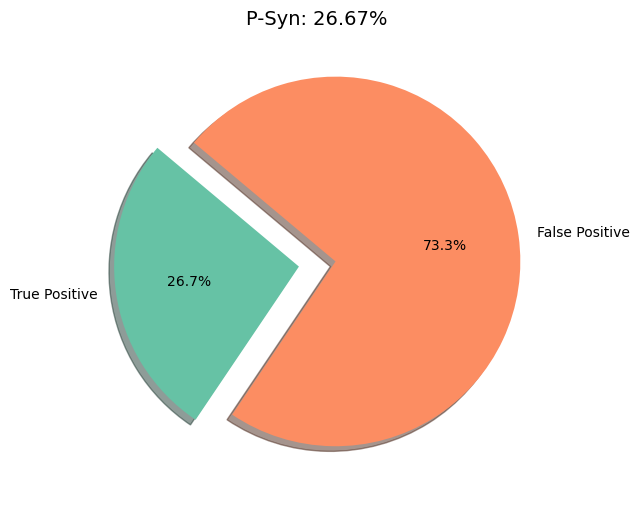

True Positive 8
Synthetic P-Value 26.666666666666668
Conditions ['charge']
Condition Value {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 35}


c:\Users\Basita Das\Codes\SynthBench_new\utils.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'VIII' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nov_mat.loc[idy, items] = values


In [ ]:
#Enter Compound formula 
comp = 'CsPbI3'

# Enter the element you want to substitute, it's coordination in the compound and its charge state
# Example: {'element': 'Pb', 'coordination': 'VIII', 'charge': 2} 
elem_prob = {'element': 'Pb', 'coordination': 'VIII', 'charge': 2}

#Enter the conditions for isovalent substitution
# The conditions should be a list of strings that represent the properties you want to filter by
# Example: ['charge', 'coordination', 'Hume-Rothery'] 
conditions = ['charge']

# Enter the values for the conditions you want to filter by
# Example: {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 15}
# The 'Hume-Rothery' condition defines a range for a target property and 
# a percentage of the target property to be considered for isovalent substitution.
condition_value = {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 35}

# Call the isovalent generator function with the specified parameters
# The function will generate a list of isovalent substitutions based on the filter criteria
nov_mat_db, true_positive, p_syn = isovalent_generator.main(icsd_true = icsd_true, comp=comp, elem_prop=elem_prob, conditions=conditions, condition_value=condition_value)

# Case 2: conditions = ['charge', 'coordination']

Conditions
----------------------------------------------------------------
charge: 2
coordination: VIII
target_property: None
target_percentage: None
----------------------------------------------------------------
----------------------------------------------------------------
Properties of the Target element
----------------------------------------------------------------
    Ion Coordination  Charge  Ionic Radius
312  Pb         VIII       2          1.29
----------------------------------------------------------------


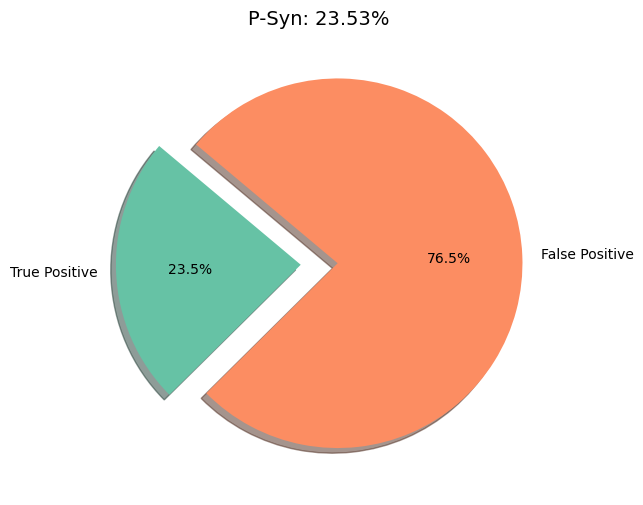

True Positive 4
Synthetic P-Value 23.529411764705884
Conditions ['charge', 'coordination']
Condition Value {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 35}


c:\Users\Basita Das\Codes\SynthBench_new\utils.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'VIII' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nov_mat.loc[idy, items] = values


In [6]:
#Enter Compound formula 
comp = 'CsPbI3'

# Enter the element you want to substitute, it's coordination in the compound and its charge state
# Example: {'element': 'Pb', 'coordination': 'VIII', 'charge': 2} 
elem_prob = {'element': 'Pb', 'coordination': 'VIII', 'charge': 2}

#Enter the conditions for isovalent substitution
# The conditions should be a list of strings that represent the properties you want to filter by
# Example: ['charge', 'coordination', 'Hume-Rothery'] 
conditions = ['charge', 'coordination']

# Enter the values for the conditions you want to filter by
# Example: {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 15}
# The 'Hume-Rothery' condition defines a range for a target property and 
# a percentage of the target property to be considered for isovalent substitution.
condition_value = {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 35}

# Call the isovalent generator function with the specified parameters
# The function will generate a list of isovalent substitutions based on the filter criteria
nov_mat_db, true_positive, p_syn = isovalent_generator.main(icsd_true = icsd_true, comp=comp, elem_prop=elem_prob, conditions=conditions, condition_value=condition_value)

# Case 3: conditions = ['charge', 'coordination', 'Hume-Rothery']

Conditions
----------------------------------------------------------------
charge: 2
coordination: VIII
target_property: Ionic Radius
target_percentage: 35
----------------------------------------------------------------
----------------------------------------------------------------
Properties of the Target element
----------------------------------------------------------------
    Ion Coordination  Charge  Ionic Radius
312  Pb         VIII       2          1.29
----------------------------------------------------------------
Ionic Radius of Pb: 1.29


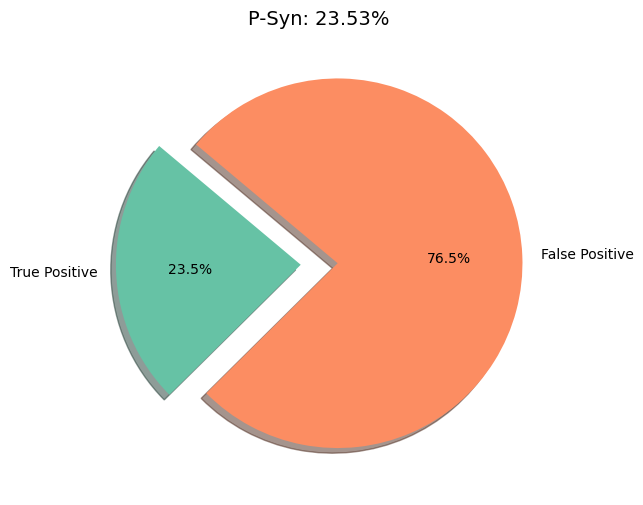

True Positive 4
Synthetic P-Value 23.529411764705884
Conditions ['charge', 'coordination', 'Hume-Rothery']
Condition Value {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 35}


c:\Users\Basita Das\Codes\SynthBench_new\utils.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'VIII' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nov_mat.loc[idy, items] = values


In [7]:
#Enter Compound formula 
comp = 'CsPbI3'

# Enter the element you want to substitute, it's coordination in the compound and its charge state
# Example: {'element': 'Pb', 'coordination': 'VIII', 'charge': 2} 
elem_prob = {'element': 'Pb', 'coordination': 'VIII', 'charge': 2}

#Enter the conditions for isovalent substitution
# The conditions should be a list of strings that represent the properties you want to filter by
# Example: ['charge', 'coordination', 'Hume-Rothery'] 
conditions = ['charge', 'coordination', 'Hume-Rothery']

# Enter the values for the conditions you want to filter by
# Example: {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 15}
# The 'Hume-Rothery' condition defines a range for a target property and 
# a percentage of the target property to be considered for isovalent substitution.
condition_value = {'charge': 2, 'coordination': 'VIII', 'target_property': 'Ionic Radius', 'target_percentage': 35}

# Call the isovalent generator function with the specified parameters
# The function will generate a list of isovalent substitutions based on the filter criteria
nov_mat_db, true_positive, p_syn = isovalent_generator.main(icsd_true = icsd_true, comp=comp, elem_prop=elem_prob, conditions=conditions, condition_value=condition_value)